In [41]:
import numpy as np
import cv2
from pprint import pprint
import ffmpeg
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import imageio

from scipy.ndimage import gaussian_filter
from sklearn.cluster import KMeans

sys.path.append('../')

from precondition import *
from detect_teammates import *

import importlib
importlib.reload(sys.modules['detect_teammates'])
from precondition import *
from detect_teammates import *

In [42]:
with open("../sequences/test_2.seq", mode = 'rb') as f:
    seq = np.fromfile(f, dtype = np.uint8)
width = 272
height = 272
channels = 3
n_frames = int(seq.shape[0] / width / height / channels)
seq = np.reshape(seq, (width, height, channels, n_frames))

In [38]:
#seq = cut_first_minute(filename)
bp_seq = band_pass_filter_seq(seq)
bp_seq_bgr = 255 * np.repeat(np.expand_dims(bp_seq.astype(np.uint8), axis = 2), 3, axis = 2)
team_blobs = filter_sequence(bp_seq_bgr, find_player_filter, s = 3, threshold = 100)
nightmare_seq = clusters_sequence(team_blobs * 255)

5


In [ ]:
# with open("../sequences/test_2.seq", mode = 'wb') as f:
#     seq.tofile(f)    

In [49]:
play_sequence(nightmare_seq)

0

In [46]:
def is_in(array, coords):
    for i in range(array.shape[0]):
        if (coords == array[i]).all():
            return True
    return False

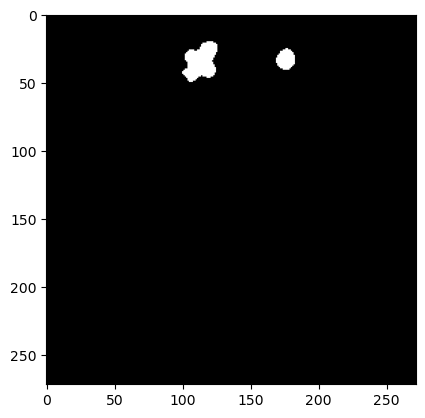

In [45]:
test_frame = team_blobs[:,:,:,10] * 255
plt.imshow(test_frame)
plt.show()

In [48]:
%%timeit
N, CA_test = connected_areas(test_frame[:,:,0])

7.04 s ± 53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [100]:
n_tanks = np.zeros(N, dtype = int)
size_threshold = 200
for i in range(N):
    upper_bound, lower_bound = np.quantile(np.where(CA_test == i)[0], [0.05, 0.95])
    left_bound, right_bound = np.quantile(np.where(CA_test == i)[1], [0.05, 0.95])
    size = (upper_bound - lower_bound) * (left_bound - right_bound)
    if size < size_threshold:
        n_tanks[i] = 1
    print(i, size)
for i in range(N):
    if n_tanks[i] == 0:
        n_tanks[i] = int(6 - n_tanks.sum()/(n_tanks == 0).sum())

0 479.0
1 132.0


In [57]:
nightmare_seq_rgb = []
for i in range(0, nightmare_seq.shape[-1], 23):
    nightmare_seq_rgb.append(cv2.cvtColor(nightmare_seq[:,:,:,i], cv2.COLOR_BGR2RGB))

In [52]:
play_sequence(nightmare_seq[:,:,:,::23])

0

In [58]:
imageio.mimsave("clusters_updated.gif", nightmare_seq_rgb)

In [101]:
n_tanks

array([5, 1])

In [97]:
n_tanks = np.array([0, 1, 1, 0])

In [99]:
(n_tanks == 0).sum()

2

In [83]:
right_bound

94.0

In [74]:
np.where(CA_test == 0)[0]

array([20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31,
       31, 31, 31, 31, 32, 32, 32, 32, 32, 33])

In [16]:
all_points = np.transpose(np.where(T))

In [20]:
all_points.shape[0]

765

True

In [ ]:
all_points

In [ ]:
play_sequence(np.diff(team_blobs[:,:,:,:]*255, axis = -1))

0

In [ ]:
diff_sum = np.sum(np.diff(team_blobs[:,:,:,:]*255, axis = -1), axis = (0,1,2))

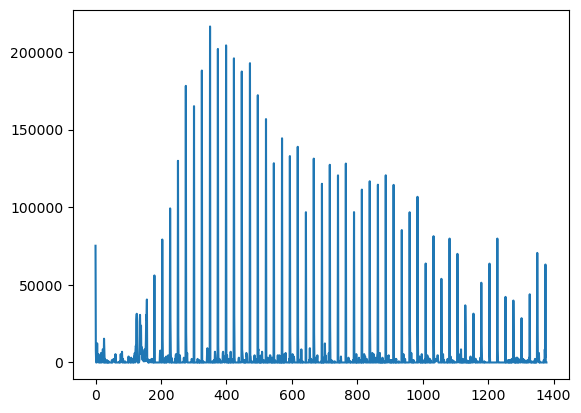

In [ ]:
plt.plot(diff_sum)
plt.show()